In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score
from sklearn.tree import export_text
import mglearn
from dashboard_one import *
from dash_model_two import *
from feature_selection import *
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

### brain_volume_ratio_to_baseline_____VS_____diagnosischanges from every visit


#### sleep_brain_dxch.csv
#### 

In [2]:
com_col = ['Phase', 'RID', 'VISCODE','PTID']
target = 'DXCHANGE'

In [3]:
sleep_brain_dxch = pd.read_csv('sleep_brain_dxch.csv').iloc[:,1:].drop(['NPIKSEV'],axis=1)
sleep_brain_dxch = sleep_brain_dxch[sleep_brain_dxch[target].notna()].reset_index().drop(['index'],axis=1)   # keep the rows where DXCHANGE is not nan
sleep_brain_dxch

,RID,Phase,VISCODE,PTID,NPIK1,NPIK2,NPIK3,NPIK4,NPIK5,NPIK6,...,ratio_PTAU_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year,ABETA_reduction_per_year,TAU_reduction_per_year,PTAU_reduction_per_year
0,2,ADNI1,m06,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,ADNI1,m36,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ADNI1,m60,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,ADNI1,m72,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,ADNI1,NaN,011_S_0002,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16095,7083,ADNI3,sc,126_S_7083,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16096,7085,ADNI3,sc,941_S_7085,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16097,7088,ADNI3,sc,033_S_7088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16098,7092,ADNI3,sc,021_S_7092,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sleep_brain_dxch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16100 entries, 0 to 16099
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RID                             16100 non-null  int64  
 1   Phase                           16100 non-null  object 
 2   VISCODE                         15004 non-null  object 
 3   PTID                            16100 non-null  object 
 4   NPIK1                           915 non-null    float64
 5   NPIK2                           914 non-null    float64
 6   NPIK3                           913 non-null    float64
 7   NPIK4                           913 non-null    float64
 8   NPIK5                           913 non-null    float64
 9   NPIK6                           914 non-null    float64
 10  NPIK7                           914 non-null    float64
 11  NPIK8                           912 non-null    float64
 12  NPIK9A                          

In [5]:
sleep_brain_dxch.columns

Index(['RID', 'Phase', 'VISCODE', 'PTID', 'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4',
       'NPIK5', 'NPIK6', 'NPIK7', 'NPIK8', 'NPIK9A', 'NPIK9B', 'NPIK9C',
       'NPIKTOT', 'insomnia', 'OSA', 'DXCHANGE', 'ratio_Ventricles_bl',
       'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl',
       'ratio_PTAU_bl', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year', 'ABETA_reduction_per_year',
       'TAU_reduction_per_year', 'PTAU_reduction_per_year'],
      dtype='object')

### brain_biomarker______VS______DXCHANGE

In [6]:
col_lst = [ 'DXCHANGE','ratio_Ventricles_bl',
       'ratio_Hippocampus_bl', 'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl',
       'ratio_Fusiform_bl', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year']
bio_lst = [ 'ratio_ABETA_bl', 'ratio_TAU_bl','ratio_PTAU_bl']
brain_dxch = sleep_brain_dxch[com_col + col_lst].set_index(['Phase', 'RID', 'VISCODE','PTID']).dropna(how='any',axis=0).reset_index()
#biomarkers to dxch
bio_dxch = sleep_brain_dxch[com_col + bio_lst].set_index(['Phase', 'RID', 'VISCODE','PTID']).dropna(how='any',axis=0).reset_index()
df = brain_dxch.copy()

In [7]:
np.sum(df.isna())   # check nan

Phase                             0
RID                               0
VISCODE                           0
PTID                              0
DXCHANGE                          0
ratio_Ventricles_bl               0
ratio_Hippocampus_bl              0
ratio_WholeBrain_bl               0
ratio_Entorhinal_bl               0
ratio_Fusiform_bl                 0
Ventricles_reduction_per_year     0
Hippocampus_reduction_per_year    0
wholebrain_reduction_per_year     0
Entorhinal_reduction_per_year     0
Fusiform_reduction_per_year       0
ICV_reduction_per_year            0
dtype: int64

In [8]:
df.groupby(target).count()

,Phase,RID,VISCODE,PTID,ratio_Ventricles_bl,ratio_Hippocampus_bl,ratio_WholeBrain_bl,ratio_Entorhinal_bl,ratio_Fusiform_bl,Ventricles_reduction_per_year,Hippocampus_reduction_per_year,wholebrain_reduction_per_year,Entorhinal_reduction_per_year,Fusiform_reduction_per_year,ICV_reduction_per_year
DXCHANGE,,,,,,,,,,,,,,,
AD-AD,404,404,404,404,404,404,404,404,404,404,404,404,404,404,404
AD-MCI,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
CN-AD,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
CN-CN,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478,1478
CN-MCI,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
MCI-AD,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456
MCI-CN,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114
MCI-MCI,1735,1735,1735,1735,1735,1735,1735,1735,1735,1735,1735,1735,1735,1735,1735


- try different combinations

In [9]:
# to distinguish MCI to AD or stay in MCI   --> As the previous challenge group used
df_2g = df.loc[df[target].isin(['MCI-AD','MCI-MCI'])].reset_index().drop(['index'],axis=1)
df_2g.shape

(2191, 16)

In [10]:
# to distinguish MCI to AD or stay in MCI or get back to CN
df_3g = df.loc[df[target].isin([ 'MCI-MCI', 'MCI-AD', 'MCI-CN',])].reset_index().drop(['index'],axis=1)
df_3g.shape

(2305, 16)

In [11]:
# to distinguish CN to MCI or stay in CN
df_2gg = df.loc[df[target].isin(['CN-MCI', 'CN-CN'])].reset_index().drop(['index'],axis=1)
df_2gg.shape

(1575, 16)

In [12]:
# combination bl of CN or MCI, 5 groups
df_5g = df.loc[brain_dxch[target].isin(['CN-MCI', 'MCI-MCI', 'MCI-AD', 'MCI-CN','CN-CN'])].reset_index().drop(['index'],axis=1)
df_5g.shape

(3880, 16)

In [13]:
# 6 labels
df_6g = df.loc[brain_dxch[target].isin(['CN-MCI', 'AD-AD', 'MCI-MCI', 'MCI-AD', 'MCI-CN','CN-CN'])].reset_index().drop(['index'],axis=1)
df_6g.shape

(4284, 16)

### undersampling and modeling

- functions
    - models(df,drop_lst,target) : under sampling, split, scale, pca, models
    - cv_models(df,drop_lst,target,k): under sampling, NOT SPLIT, scale, pca, models with cross-validation 

In [14]:
drop_lst = ['Phase', 'RID', 'VISCODE', 'PTID',target]

k=10

# - 'MCI-AD': 471, 'MCI-MCI': 471

-  MCI-AD': 471, 'MCI-MCI': 471
- original dataset: random forest 90trees. f1-score on training data: 1.000 f1-score on test data: 0.783, 10-fold cross validation

In [15]:
models(df_2g,drop_lst,target)

After undersampling data size is 912 ; Resampled dataset shape Counter({'MCI-AD': 456, 'MCI-MCI': 456})

6 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.682, Test set f1-score: 0.603
          - saga_L1, Training set f1-score:0.682, Test set f1-score: 0.603
          - newton-cg_L2, Training set f1-score:0.682, Test set f1-score: 0.603
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.716, Test set f1-score: 0.714
          - saga_L1, Training set f1-score:0.682, Test set f1-score: 0.603
          - newton-cg_L2, Training set f1-score:0.716, Test set f1-score: 0.714
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.761, Test set f1-score: 0.771
          - saga_L1, Training set f1-score:0.734, Test set f1-score: 0.755
    

          - 10trees. f1-score on training data: 0.986 f1-score on test data: 0.781
          - 15trees. f1-score on training data: 0.996 f1-score on test data: 0.809
          - 20trees. f1-score on training data: 0.996 f1-score on test data: 0.797
          - 25trees. f1-score on training data: 0.999 f1-score on test data: 0.786
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.769
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.781
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.786
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.791
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.786
          - 55trees. f1-score on training data: 1.000 f1-score on test data: 0.792
          - 60trees. f1-score on training data: 1.000 f1-score on test data: 0.786
          - 65trees. f1-score on training data: 1.000 f1-score on test data: 0.786
    

In [16]:
cv_models(df_2g,drop_lst,target,k)

After undersampling data size is 912 ; Resampled dataset shape Counter({'MCI-AD': 456, 'MCI-MCI': 456})

6 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.738
          - saga_L1, average weighted f1-score of 10-cross validation:0.332
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.738
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.744
          - saga_L1, average weighted f1-score of 10-cross validation:0.331
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.744
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.752
          - saga_L1, average weighted f1-score of 10-cross validation:0.725
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.752
       - C = 1
          

          - 25trees. average weighted f1-score of 10-cross validation:0.762
          - 30trees. average weighted f1-score of 10-cross validation:0.766
          - 35trees. average weighted f1-score of 10-cross validation:0.772
          - 40trees. average weighted f1-score of 10-cross validation:0.775
          - 45trees. average weighted f1-score of 10-cross validation:0.773
          - 50trees. average weighted f1-score of 10-cross validation:0.767
          - 55trees. average weighted f1-score of 10-cross validation:0.773
          - 60trees. average weighted f1-score of 10-cross validation:0.769
          - 65trees. average weighted f1-score of 10-cross validation:0.769
          - 70trees. average weighted f1-score of 10-cross validation:0.772
          - 75trees. average weighted f1-score of 10-cross validation:0.769
          - 80trees. average weighted f1-score of 10-cross validation:0.771
          - 85trees. average weighted f1-score of 10-cross validation:0.770
          - 

- Model selection:
- original data, 10 fold-cv, randomforest: 90trees. average weighted f1-score of 10-cross validation:0.773

After undersampling data size is 912 ; Resampled dataset shape Counter({'MCI-AD': 456, 'MCI-MCI': 456})

6 principle components are needed to explain 90% of the data

Features sorted by their score for each estimator 


,avg_importance,importance_1,importance_2,importance_3,importance_4,importance_5,importance_6,importance_7,importance_8,importance_9,importance_10
ratio_Ventricles_bl,0.169794,0.175124,0.165148,0.163583,0.169610,0.172999,0.173156,0.169377,0.168916,0.173408,0.166616
ratio_Hippocampus_bl,0.159510,0.160151,0.153166,0.163462,0.170252,0.158334,0.154589,0.166782,0.161076,0.147845,0.159445
ratio_Fusiform_bl,0.106719,0.100405,0.097066,0.112787,0.103480,0.100547,0.117582,0.108392,0.105877,0.110352,0.110700
Hippocampus_reduction_per_year,0.092454,0.094723,0.104333,0.099306,0.092149,0.088324,0.096741,0.091065,0.088695,0.088785,0.080419
ratio_Entorhinal_bl,0.091425,0.080244,0.080997,0.094688,0.084981,0.095195,0.092494,0.092371,0.101419,0.094431,0.097427
Ventricles_reduction_per_year,0.081996,0.084199,0.095601,0.077286,0.081707,0.087719,0.080650,0.077915,0.074805,0.081438,0.078641
ratio_WholeBrain_bl,0.075577,0.080319,0.080823,0.070350,0.074611,0.074426,0.067341,0.066725,0.074225,0.081364,0.085588
Entorhinal_reduction_per_year,0.060006,0.062579,0.058789,0.059474,0.059884,0.059889,0.061618,0.058022,0.058758,0.058889,0.062155
Fusiform_reduction_per_year,0.056578,0.055922,0.054298,0.055237,0.062864,0.056437,0.054849,0.061040,0.056682,0.054734,0.053712
wholebrain_reduction_per_year,0.053795,0.056558,0.055991,0.052462,0.049682,0.053337,0.050893,0.055144,0.053766,0.055417,0.054703


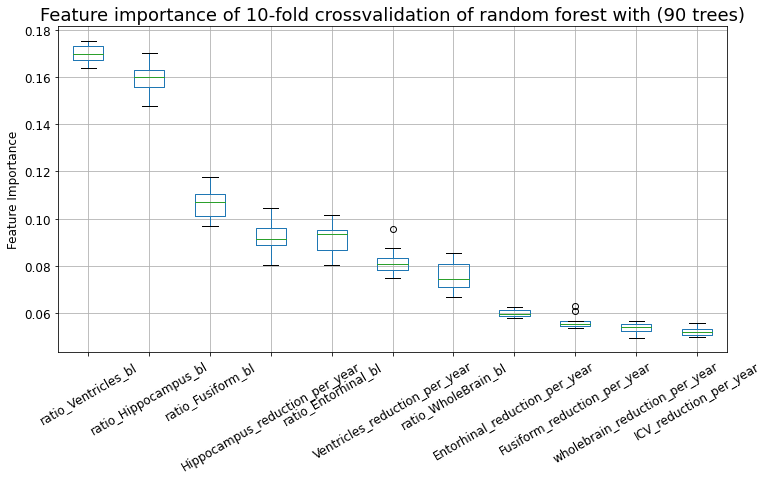

In [17]:
res = usampling_scale_data(df_2g,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators =90, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (90 trees)'
feature_importance(X,y,clf,10,title_label)

- 'MCI-AD': 132, 'MCI-CN': 132, 'MCI-MCI': 132}

In [18]:
models(df_3g,drop_lst,target)

After undersampling data size is 342 ; Resampled dataset shape Counter({'MCI-AD': 114, 'MCI-CN': 114, 'MCI-MCI': 114})

5 principle components are needed to explain 90% of the data

Output dataframes sequence: X_train,X_test,X_train_scaled,X_test_scaled,X_train_pca,X_test_pca,y_train,y_test
- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, Training set f1-score:0.524, Test set f1-score: 0.395
          - saga_L1, Training set f1-score:0.496, Test set f1-score: 0.516
          - newton-cg_L2, Training set f1-score:0.524, Test set f1-score: 0.395
       - C = 0.01
          - lbfgs_L2, Training set f1-score:0.511, Test set f1-score: 0.395
          - saga_L1, Training set f1-score:0.524, Test set f1-score: 0.395
          - newton-cg_L2, Training set f1-score:0.511, Test set f1-score: 0.395
       - C = 0.1
          - lbfgs_L2, Training set f1-score:0.630, Test set f1-score: 0.560
          - saga_L1, Training set f1-score:0.616, Test set f1-sc

          - tree depth: 14.000. f1-score on training data: 1.000 f1-score on test data: 0.594
    - Random forest
          - 5trees. f1-score on training data: 0.938 f1-score on test data: 0.648
          - 10trees. f1-score on training data: 0.989 f1-score on test data: 0.631
          - 15trees. f1-score on training data: 0.996 f1-score on test data: 0.637
          - 20trees. f1-score on training data: 1.000 f1-score on test data: 0.564
          - 25trees. f1-score on training data: 0.996 f1-score on test data: 0.633
          - 30trees. f1-score on training data: 1.000 f1-score on test data: 0.615
          - 35trees. f1-score on training data: 1.000 f1-score on test data: 0.587
          - 40trees. f1-score on training data: 1.000 f1-score on test data: 0.653
          - 45trees. f1-score on training data: 1.000 f1-score on test data: 0.639
          - 50trees. f1-score on training data: 1.000 f1-score on test data: 0.641
          - 55trees. f1-score on training data: 1.000 f1-

In [ ]:
cv_models(df_3g,drop_lst,target,k)

After undersampling data size is 342 ; Resampled dataset shape Counter({'MCI-AD': 114, 'MCI-CN': 114, 'MCI-MCI': 114})

5 principle components are needed to explain 90% of the data

- Using original dataset:
    - Logistic regression
       - C = 0.001
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.353
          - saga_L1, average weighted f1-score of 10-cross validation:0.169
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.353
       - C = 0.01
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.486
          - saga_L1, average weighted f1-score of 10-cross validation:0.162
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.486
       - C = 0.1
          - lbfgs_L2, average weighted f1-score of 10-cross validation:0.529
          - saga_L1, average weighted f1-score of 10-cross validation:0.357
          - newton-cg_L2, average weighted f1-score of 10-cross validation:0.529
       - C

          - 25trees. average weighted f1-score of 10-cross validation:0.592
          - 30trees. average weighted f1-score of 10-cross validation:0.590
          - 35trees. average weighted f1-score of 10-cross validation:0.594
          - 40trees. average weighted f1-score of 10-cross validation:0.600
          - 45trees. average weighted f1-score of 10-cross validation:0.606
          - 50trees. average weighted f1-score of 10-cross validation:0.600


- original or scaled data: random forest 30trees. average weighted f1-score of 10-cross validation:0.627

In [ ]:
res = usampling_scale_data(df_3g,drop_lst,target)     
X = res[0]
y = res[3]
clf = RandomForestClassifier(n_estimators = 30, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (30 trees)'
feature_importance(X,y,clf,k,title_label)

- 'CN-CN': 103, 'CN-MCI': 103

In [ ]:
models(df_2gg,drop_lst,target)

In [ ]:
cv_models(df_2gg,drop_lst,target,k)

- pca data, random forest 95trees. average weighted f1-score of 10-cross validation:0.623

In [ ]:
res = usampling_scale_data(df_2gg,drop_lst,target)     
X = res[2]
y = res[3]
clf = RandomForestClassifier(n_estimators = 95, random_state = 5862)
title_label = '10-fold crossvalidation of random forest with (95 trees)'
feature_importance(X,y,clf,k,title_label)

- 'CN-CN': 103, 'CN-MCI': 103, 'MCI-AD': 103, 'MCI-CN': 103, 'MCI-MCI': 103
- all not so good. No selection

In [ ]:
models(df_5g,drop_lst,target)

In [ ]:
cv_models(df_5g,drop_lst,target,k)

- 'AD-AD': 103, 'CN-CN': 103, 'CN-MCI': 103, 'MCI-AD': 103, 'MCI-CN': 103, 'MCI-MCI': 103

In [ ]:
models(df_6g,drop_lst,target)

In [ ]:
cv_models(df_6g,drop_lst,target,k)

In [ ]:

# feature importance check
def feature_importance(X,y,clf,k,title_label):
    '''
    check the feature importance of the selected classification (decisiontree or random forest) model.
    X: input data
    y: output data
    clf: classification model, e.g.clf = RandomForestClassifier(n_estimators = 90, random_state = 5862) 
    Return
    ------
    dataframe of raw importance info
    boxplot of importance
    '''
    output = cross_validate(clf, X, y, cv=k, scoring = 'f1_weighted', return_estimator =True)
    d = {}  # dictionary to collect all importance dataframes 
    print("Features sorted by their score for each estimator ")
    for idx,estimator in enumerate(output['estimator']):   
        feature_importances = pd.DataFrame(estimator.feature_importances_,
                                           index = X.columns,
                                            columns=["importance_%s"% (idx+1)])
        d[idx] = feature_importances  
    df = d[0]  # dataframe to concat all dataframes in d
    for i in range(1,len(d)):
        df = pd.concat([df,d[i]],axis=1)
    df['avg_importance'] = df.mean(axis=1)
    df = df.sort_values(by = ['avg_importance'], ascending = [False])
    # insert avg_importance column as first column
    df.insert(0, 'avg_importance', df.pop('avg_importance'))
    # preparation for plotting
    dff = df.T.reset_index().iloc[1:,1:] 
    # plot feature importance
    bp = dff.boxplot(rot=30,figsize=(12,6),fontsize=12)
    bp.set_ylabel('Feature Importance',fontsize=12)
    bp.set_title('Feature importance of %s'%(title_label),fontsize=18)
    return df